### Task 4.1

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from scipy.stats import multivariate_normal
from scipy.special import softmax

load dataset

In [5]:
#load MNIST data from openml.org/d/554
images, labels = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
images = images/255 # normalize to [0,1]
labels = labels.astype(int) # convert labels to integers

train_images, train_labels = images[:60_000], labels[:60_000] #split to train and test
test_images, test_labels = images[60_000:], labels[60_000:]

print('training images:', train_images.shape) #checking
print('test images:', test_images.shape)


training images: (60000, 784)
test images: (10000, 784)


plot first 100 training images

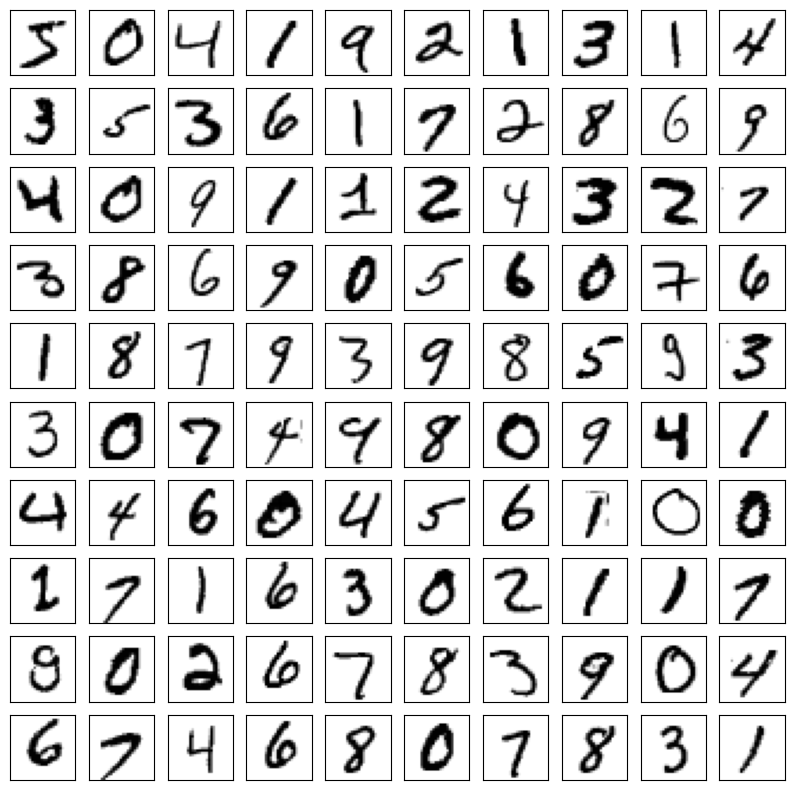

In [6]:
# plot first 100 training images
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for image, ax in zip(train_images, axes.flat):
        ax.set_xticks(())
        ax.set_yticks(())
        ax.grid(False)
        ax.imshow(image.reshape(28, 28), vmin=0.0, vmax=1.0, cmap='gray_r')
plt.show()

In [11]:
#center the training images
train_mean = train_images.mean(axis=0)
train_images_centered = train_images - train_mean


# variable S contains the singular values of train_images_centered
U, S, Vt = np.linalg.svd(train_images_centered, full_matrices=False)
S[:4] #four largest sinular values

array([554.08236184, 473.79289646, 441.76832659, 412.90967564])

In [10]:
#recover train_images_centered from it's singular decomposition
# np.allclose(train_images_centered, (U * S) @ Vt)

True

In [12]:
# compress the dataset to 2 dimensions

#compute the encodings of the trianing data
train_encodings = train_images_centered @ Vt.T[:,:2]
#compute the encodings of the test data
test_images_centered = test_images - train_mean
test_encodings = test_images_centered @Vt.T[:,:2]

In [13]:
# 2d scatter plot of the encodings

def plot_encodings(train_encodings, train_labels, test_encodings, test_labels):
    
    #create two plots side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

    ax = axes[0]
    ax.scatter(
        train_encodings[:,0], train_encodings[:,1],
        c=train_labels, cmap=plt.cm.tab10, vmin=-0.5, vmax=9.5, alpha=0.7
    )
    ax.set_xlabel("$z_1$")
    ax.set_ylabel("$z_2$")
    ax.set_title("training data")
    
    # plot encodings of test data
    ax = axes[1]
    scatter = ax.scatter(
        test_encodings[:, 0], test_encodings[:, 1],
        c=test_labels, cmap=plt.cm.tab10, vmin=-0.5, vmax=9.5, alpha=0.7
    )
    ax.set_xlabel("$z_1$")
    ax.set_ylabel("$z_2$")
    ax.set_title("test data")

    # add colorbar
    cb = fig.colorbar(scatter, ticks=range(10), ax=axes.ravel().tolist())
    cb.ax.set_title("digit")
    
    return fig

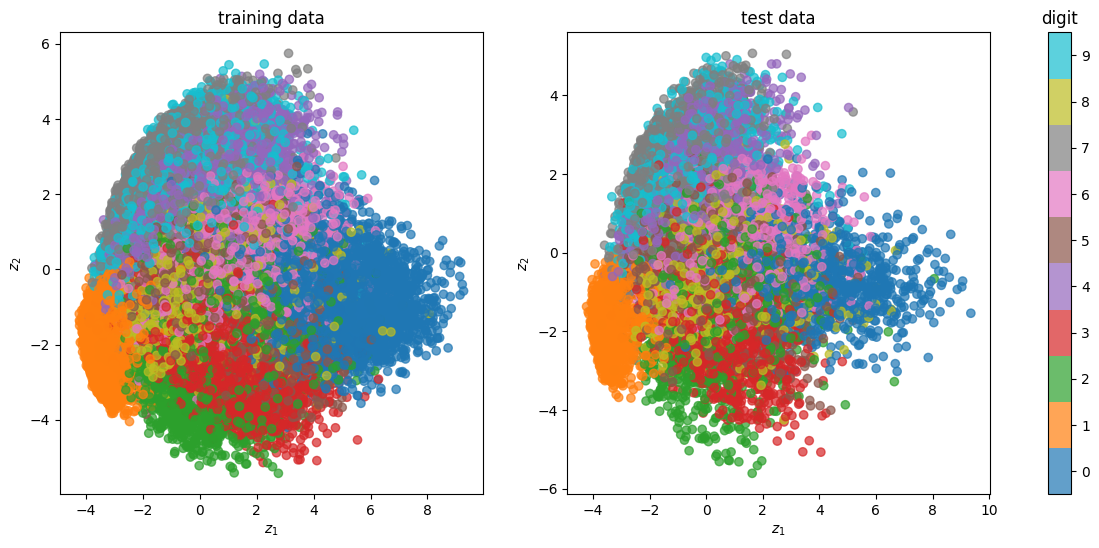

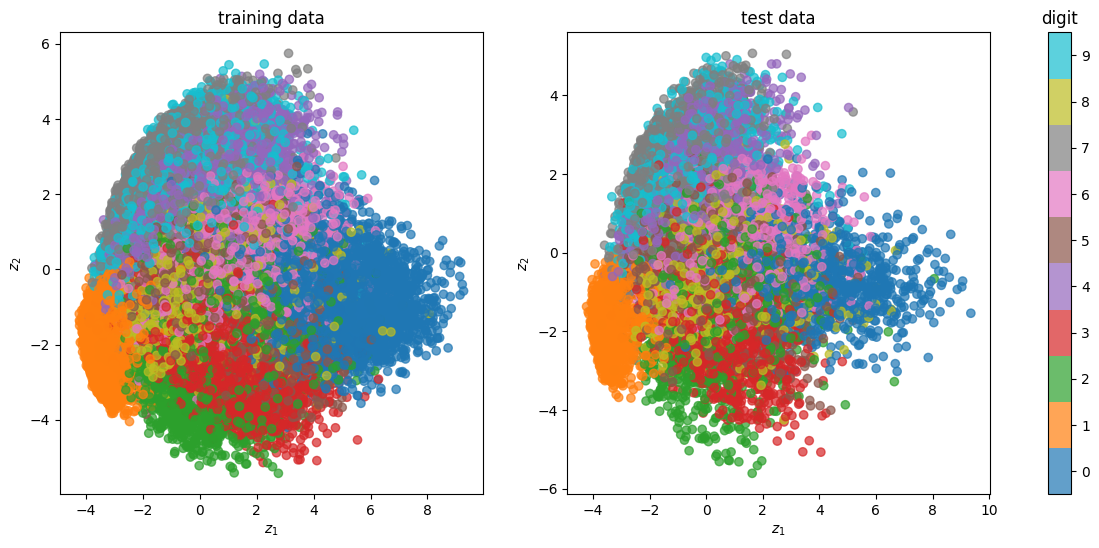

In [14]:
plot_encodings(train_encodings, train_labels, test_encodings, test_labels)

In [16]:
# compute reconstruction
test_reconstruction = train_mean + test_encodings @ Vt[:2,:]

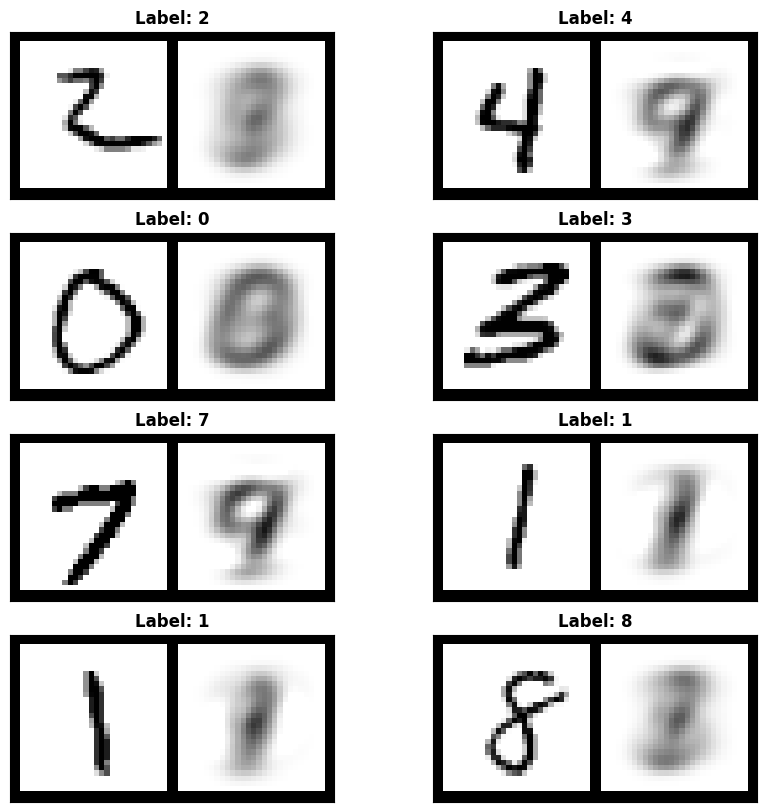

In [17]:
# plot a grid of random pairs of `originals` and `reconstructions`
def plot_reconstructions(originals, reconstructions, labels, num_rows=4, num_cols=2):
    # indices of displayed samples
    n = originals.shape[0]
    indices = np.random.choice(n, size=num_rows*num_cols, replace=False)

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
    for (idx, ax) in zip(indices, axes.flat):
        # extract original, reconstruction, and label
        original = originals[idx]
        reconstruction = reconstructions[idx]
        label = labels[idx]

        # configure subplot
        ax.set_xticks(())
        ax.set_yticks(())
        ax.grid(False)
        ax.set_title(f"Label: {label}", fontweight='bold')

        # plot original and reconstructed image in a grid
        grid = np.ones((32, 62))
        grid[2:30, 2:30] = original.reshape(28, 28)
        grid[2:30, 32:60] = reconstruction.reshape(28, 28)
        ax.imshow(grid, vmin=0.0, vmax=1.0, cmap='gray_r')

    return fig

plot_reconstructions(test_images, test_reconstruction, test_labels)
plt.show()

In [18]:
#reconstruction error
sqerr = ((test_images-test_reconstruction)**2).sum(axis=1).mean()
print(f"Average squared reconstruciton error: {sqerr}")

Average squared reconstruciton error: 43.644881416398285
